In [ ]:
# Instalando as bibliocas
!pip install pymcdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymcdm import methods as mcdm_methods
from pymcdm import normalizations as norm

In [ ]:
# Definindo a base de dados fornecidas no artigo científico
df = pd.DataFrame({"Produto" : ["Tecidos, exceto de malha", 
"Artefatos têxteis, exceto vestuário",  "Peixes congelados (exceto filés)",  "Crustáceos",
"FrutaIrrigada", "Cana de açúcar", "Sal Marinho", "Cerâmica Vermelha", "Cerveja",
"Cachaça e outras bebidas destiladas",  "Granito", "Naceles"],
"EXP": [4, 4, 2, 3, 5, 3, 1, 1, 1, 1, 2, 1],
"DEM": [3, 3, 5, 5, 5, 2, 4, 1, 2, 1, 5, 5],
"VA":  [2, 3, 4, 3, 2, 2, 1, 1, 2, 2, 5, 5],
"MP":  [2, 3, 4, 5, 4, 4, 5, 5, 2, 4, 5, 5],
"EMP": [3, 5, 4, 5, 2, 1, 1, 3, 2, 3, 4, 3],
"GHS": [3, 5, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3],
"CL":  [5, 5, 4, 4, 3, 4, 4, 3, 5, 5, 2, 2],
"CI":  [3, 5, 2, 3, 4, 4, 3, 2, 3, 3, 2, 2],
"BE":  [4, 4, 4, 3, 3, 3, 2, 2, 5, 5, 3, 3]}, index=np.arange(1, 13))

df

,Produto,EXP,DEM,VA,MP,EMP,GHS,CL,CI,BE
1,"Tecidos, exceto de malha",4,3,2,2,3,3,5,3,4
2,"Artefatos têxteis, exceto vestuário",4,3,3,3,5,5,5,5,4
3,Peixes congelados (exceto filés),2,5,4,4,4,2,4,2,4
4,Crustáceos,3,5,3,5,5,1,4,3,3
5,FrutaIrrigada,5,5,2,4,2,2,3,4,3
6,Cana de açúcar,3,2,2,4,1,2,4,4,3
7,Sal Marinho,1,4,1,5,1,2,4,3,2
8,Cerâmica Vermelha,1,1,1,5,3,2,3,2,2
9,Cerveja,1,2,2,2,2,2,5,3,5
10,Cachaça e outras bebidas destiladas,1,1,2,4,3,2,5,3,5


In [ ]:
# Definindo a mareiz D alternativas
matrizD = np.array([[4., 3., 2., 2., 3., 3., 5., 3., 4.],
                    [4., 3., 3., 3., 5., 5., 5., 5., 4.],
                    [2., 5., 4., 4., 4., 2., 4., 2., 4.],
                    [3., 5., 3., 5., 5., 1., 4., 3., 3.],
                    [5., 5., 2., 4., 2., 2., 3., 4., 3.],
                    [3., 2., 2., 4., 1., 2., 4., 4., 3.],
                    [1., 4., 1., 5., 1., 2., 4., 3., 2.],
                    [1., 1., 1., 5., 3., 2., 3., 2., 2.],
                    [1., 2., 2., 2., 2., 2., 5., 3., 5.],
                    [1., 1., 2., 4., 3., 2., 5., 3., 5.],
                    [2., 5., 5., 5., 4., 3., 2., 2., 3.],
                    [1., 5., 5., 5., 3., 3., 2., 2., 3.]])

# Definindo os pesos para cada um dos cretérios
pesos = np.array([0.0325, 0.1505, 0.0895, 0.0535, 0.084, 0.0895, 0.119, 0.3125, 0.068])

# Definindo todos os critérios como de maximização
tipo = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#Normalizando a matrizD inicial pelas normalizações 01, máximo, mínimo e euclidiama
norm_01 = norm.normalize_matrix(matrizD, norm.minmax_normalization, tipo)
norm_max = norm.normalize_matrix(matrizD, norm.max_normalization, tipo)
norm_soma = norm.normalize_matrix(matrizD, norm.sum_normalization, tipo)
norm_euc = norm.normalize_matrix(matrizD, norm.vector_normalization, tipo)

In [ ]:
# Transformando a matriz normalizada em formato de DataFrame
df_norm_01 = pd.DataFrame(norm_01, columns=("EXP",	"DEM",	"VA",	"MP",	"EMP",	"GHS",	"CL",	"CI",	"BE"), index=np.arange(1, 13))
df_norm_01

,EXP,DEM,VA,MP,EMP,GHS,CL,CI,BE
1,0.75,0.50,0.25,0.000000,0.50,0.50,1.000000,0.333333,0.666667
2,0.75,0.50,0.50,0.333333,1.00,1.00,1.000000,1.000000,0.666667
3,0.25,1.00,0.75,0.666667,0.75,0.25,0.666667,0.000000,0.666667
4,0.50,1.00,0.50,1.000000,1.00,0.00,0.666667,0.333333,0.333333
5,1.00,1.00,0.25,0.666667,0.25,0.25,0.333333,0.666667,0.333333
6,0.50,0.25,0.25,0.666667,0.00,0.25,0.666667,0.666667,0.333333
7,0.00,0.75,0.00,1.000000,0.00,0.25,0.666667,0.333333,0.000000
8,0.00,0.00,0.00,1.000000,0.50,0.25,0.333333,0.000000,0.000000
9,0.00,0.25,0.25,0.000000,0.25,0.25,1.000000,0.333333,1.000000
10,0.00,0.00,0.25,0.666667,0.50,0.25,1.000000,0.333333,1.000000


In [ ]:
# Transformando a matriz normalizada em formato de DataFrame
df_norm_max = pd.DataFrame(norm_max, columns=("EXP",	"DEM",	"VA",	"MP",	"EMP",	"GHS",	"CL",	"CI",	"BE"), index=np.arange(1, 13))
df_norm_max

,EXP,DEM,VA,MP,EMP,GHS,CL,CI,BE
1,0.8,0.6,0.4,0.4,0.6,0.6,1.0,0.6,0.8
2,0.8,0.6,0.6,0.6,1.0,1.0,1.0,1.0,0.8
3,0.4,1.0,0.8,0.8,0.8,0.4,0.8,0.4,0.8
4,0.6,1.0,0.6,1.0,1.0,0.2,0.8,0.6,0.6
5,1.0,1.0,0.4,0.8,0.4,0.4,0.6,0.8,0.6
6,0.6,0.4,0.4,0.8,0.2,0.4,0.8,0.8,0.6
7,0.2,0.8,0.2,1.0,0.2,0.4,0.8,0.6,0.4
8,0.2,0.2,0.2,1.0,0.6,0.4,0.6,0.4,0.4
9,0.2,0.4,0.4,0.4,0.4,0.4,1.0,0.6,1.0
10,0.2,0.2,0.4,0.8,0.6,0.4,1.0,0.6,1.0


In [ ]:
# Transformando a matriz normalizada em formato de DataFrame
df_norm_soma = pd.DataFrame(norm_soma, columns=("EXP",	"DEM",	"VA",	"MP",	"EMP",	"GHS",	"CL",	"CI",	"BE"), index=np.arange(1, 13))
df_norm_soma

,EXP,DEM,VA,MP,EMP,GHS,CL,CI,BE
1,0.142857,0.073171,0.06250,0.041667,0.083333,0.103448,0.108696,0.083333,0.097561
2,0.142857,0.073171,0.09375,0.062500,0.138889,0.172414,0.108696,0.138889,0.097561
3,0.071429,0.121951,0.12500,0.083333,0.111111,0.068966,0.086957,0.055556,0.097561
4,0.107143,0.121951,0.09375,0.104167,0.138889,0.034483,0.086957,0.083333,0.073171
5,0.178571,0.121951,0.06250,0.083333,0.055556,0.068966,0.065217,0.111111,0.073171
6,0.107143,0.048780,0.06250,0.083333,0.027778,0.068966,0.086957,0.111111,0.073171
7,0.035714,0.097561,0.03125,0.104167,0.027778,0.068966,0.086957,0.083333,0.048780
8,0.035714,0.024390,0.03125,0.104167,0.083333,0.068966,0.065217,0.055556,0.048780
9,0.035714,0.048780,0.06250,0.041667,0.055556,0.068966,0.108696,0.083333,0.121951
10,0.035714,0.024390,0.06250,0.083333,0.083333,0.068966,0.108696,0.083333,0.121951


In [ ]:
# Transformando a matriz normalizada em formato de DataFrame
df_norm_euc = pd.DataFrame(norm_euc, columns=("EXP",	"DEM",	"VA",	"MP",	"EMP",	"GHS",	"CL",	"CI",	"BE"), index=np.arange(1, 13))
df_norm_euc

,EXP,DEM,VA,MP,EMP,GHS,CL,CI,BE
1,0.426401,0.230769,0.194257,0.139347,0.265165,0.333333,0.362738,0.276172,0.325515
2,0.426401,0.230769,0.291386,0.209020,0.441942,0.555556,0.362738,0.460287,0.325515
3,0.213201,0.384615,0.388514,0.278693,0.353553,0.222222,0.290191,0.184115,0.325515
4,0.319801,0.384615,0.291386,0.348367,0.441942,0.111111,0.290191,0.276172,0.244137
5,0.533002,0.384615,0.194257,0.278693,0.176777,0.222222,0.217643,0.368230,0.244137
6,0.319801,0.153846,0.194257,0.278693,0.088388,0.222222,0.290191,0.368230,0.244137
7,0.106600,0.307692,0.097129,0.348367,0.088388,0.222222,0.290191,0.276172,0.162758
8,0.106600,0.076923,0.097129,0.348367,0.265165,0.222222,0.217643,0.184115,0.162758
9,0.106600,0.153846,0.194257,0.139347,0.176777,0.222222,0.362738,0.276172,0.406894
10,0.106600,0.076923,0.194257,0.278693,0.265165,0.222222,0.362738,0.276172,0.406894


In [ ]:
# Definindo o método TOPSIS com as normalizações 01, máximo, mínimo e euclidiana
topsis_01 = mcdm_methods.TOPSIS(norm.minmax_normalization)
topsis_max = mcdm_methods.TOPSIS(norm.max_normalization)
topsis_sum = mcdm_methods.TOPSIS(norm.sum_normalization)
topsis_euc = mcdm_methods.TOPSIS(norm.vector_normalization)

resp_topsis_01 = topsis_01(matrizD, pesos, tipo)
resp_topsis_max = topsis_max(matrizD, pesos, tipo)
resp_topsis_sum = topsis_sum(matrizD, pesos, tipo)
resp_topsis_eucl = topsis_euc(matrizD, pesos, tipo)

In [ ]:
# Imprimindo o resultado do TOPSIS
print(f"""
resp_topsis_01 = {resp_topsis_01}

resp_topsis_max = {resp_topsis_max}

resp_topsis_sum = {resp_topsis_sum}

resp_topsis_eucl = {resp_topsis_eucl}
""")


resp_topsis_01 = [0.44022486 0.79172065 0.38423271 0.48903215 0.59799609 0.52632358
 0.40519713 0.17615175 0.40011177 0.39620487 0.36927291 0.36075612]

resp_topsis_max = [0.44419555 0.75995618 0.43552718 0.52117139 0.59439235 0.47911947
 0.41187656 0.17979079 0.3781645  0.36870445 0.43132781 0.42070352]

resp_topsis_sum = [0.42794935 0.77255647 0.4107163  0.48630524 0.57309191 0.47239129
 0.37712333 0.1683828  0.35298882 0.34798653 0.42591485 0.41396183]

resp_topsis_eucl = [0.42731789 0.77921704 0.40132151 0.48061372 0.57388596 0.48025347
 0.37720162 0.16827648 0.35757189 0.35333127 0.41456297 0.40304185]



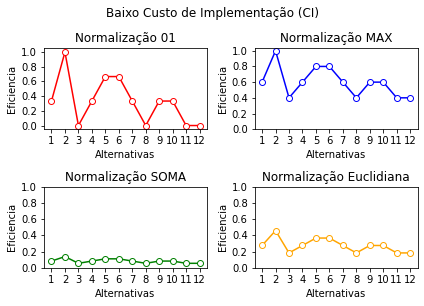

In [ ]:
fig, axs = plt.subplots(2, 2)
cont = np.arange(1, 13, 1)
efc_01 = np.arange(0, 1.2, 0.2)

axs[0, 0].plot(cont, df_norm_01["CI"], color="red", marker="o", markerfacecolor="white")
axs[0, 0].set_title('Normalização 01')

axs[0, 1].plot(cont, df_norm_max["CI"], color="blue", marker="o", markerfacecolor="white")
axs[0, 1].set_title('Normalização MAX')

axs[1, 0].plot(cont, df_norm_soma["CI"], color="green", marker="o", markerfacecolor="white")
axs[1, 0].set_title('Normalização SOMA')

axs[1, 1].plot(cont, df_norm_euc["CI"], color="orange", marker="o", markerfacecolor="white")
axs[1, 1].set_title('Normalização Euclidiana')

for ax in axs.flat:
    ax.set(xlabel='Alternativas', ylabel='Eficiencia')
    ax.set_xticks(cont)
    ax.set_yticks(efc_01)

st = fig.suptitle("Baixo Custo de Implementação (CI)", y=1.05)
fig.tight_layout()
plt.show()

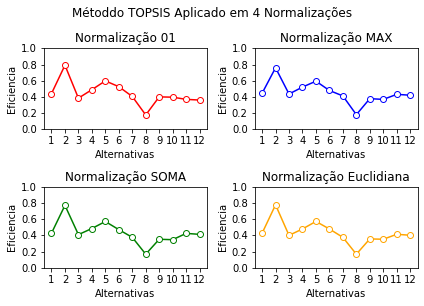

In [ ]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(cont, resp_topsis_01, color="red", marker="o", markerfacecolor="white")
axs[0, 0].set_title('Normalização 01')

axs[0, 1].plot(cont, resp_topsis_max, color="blue", marker="o", markerfacecolor="white")
axs[0, 1].set_title('Normalização MAX')

axs[1, 0].plot(cont, resp_topsis_sum, color="green", marker="o", markerfacecolor="white")
axs[1, 0].set_title('Normalização SOMA')

axs[1, 1].plot(cont, resp_topsis_eucl, color="orange", marker="o", markerfacecolor="white")
axs[1, 1].set_title('Normalização Euclidiana')

for ax in axs.flat:
    ax.set(xlabel='Alternativas', ylabel='Eficiencia')
    ax.set_xticks(cont)
    ax.set_yticks(efc_01)

st = fig.suptitle("Métoddo TOPSIS Aplicado em 4 Normalizações", y=1.05)
fig.tight_layout()
plt.show()

In [ ]:
# Definindo o médoto promethee2 e aplicando na matrizD
q = np.array([3.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0])
p = np.array([5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0])

pesos = np.array([0.0325, 0.1505, 0.0895, 0.0535, 0.084, 0.0895, 0.119, 0.3125, 0.068])


promethee2_usual = mcdm_methods.PROMETHEE_II(preference_function='usual')
promethee2_ushape = mcdm_methods.PROMETHEE_II(preference_function='ushape')
promethee2_vshape = mcdm_methods.PROMETHEE_II(preference_function='vshape')
promethee2_level = mcdm_methods.PROMETHEE_II(preference_function='level')
promethee2_linear = mcdm_methods.PROMETHEE_II(preference_function='vshape_2')


resp_promethee2_usual = promethee2_usual(matrizD, pesos, tipo, p=p, q=q)
resp_promethee2_ushape = promethee2_ushape(matrizD, pesos, tipo, p=p, q=q)
resp_promethee2_vshape = promethee2_vshape(matrizD, pesos, tipo, p=p, q=q)
resp_promethee2_level = promethee2_level(matrizD, pesos, tipo, p=p, q=q)
resp_promethee2_linear = promethee2_linear(matrizD, pesos, tipo, p=p, q=q)

In [ ]:
df_pq = pd.DataFrame([p, q], columns=("EXP",	"DEM",	"VA",	"MP",	"EMP",	"GHS",	"CL",	"CI",	"BE"), index=["p", "q"])
df_pq

,EXP,DEM,VA,MP,EMP,GHS,CL,CI,BE
p,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
q,3.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0


In [ ]:
# Imprimindo o resultado do Promethee
print(f"""
resp_promethee2_usual = {resp_promethee2_usual}

resp_promethee2_ushape = {resp_promethee2_ushape}

resp_promethee2_vshape = {resp_promethee2_vshape}

resp_promethee2_level = {resp_promethee2_level}

resp_promethee2_linear = {resp_promethee2_linear}
""")


resp_promethee2_usual = [ 0.12604545  0.59059091 -0.03195455  0.17090909  0.16772727  0.00354545
 -0.1885     -0.58322727 -0.06927273 -0.03927273 -0.04004545 -0.10654545]

resp_promethee2_ushape = [-0.06677273  0.35354545  0.04190909  0.10745455  0.12754545 -0.00177273
 -0.02072727 -0.27609091 -0.12181818 -0.10959091 -0.00772727 -0.02595455]

resp_promethee2_vshape = [ 0.01218182  0.31627273  0.03890909  0.10136364  0.085      -0.04277273
 -0.08845455 -0.28345455 -0.07890909 -0.06786364  0.01886364 -0.01113636]

resp_promethee2_level = [-0.03338636  0.17677273  0.02095455  0.05372727  0.06377273 -0.00088636
 -0.01036364 -0.13804545 -0.06090909 -0.05479545 -0.00386364 -0.01297727]

resp_promethee2_linear = [-0.02181061  0.19058333  0.03576515  0.07210606  0.06572727 -0.04018939
 -0.02500758 -0.16615909 -0.06529545 -0.08198485  0.02268939  0.01357576]



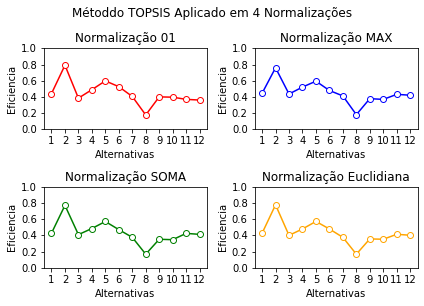

In [ ]:
fig, axs = plt.subplots(2, 2)
efc_01 = np.arange(0, 1.2, 0.2)

axs[0, 0].plot(cont, resp_topsis_01, color="red", marker="o", markerfacecolor="white")
axs[0, 0].set_title('Normalização 01')

axs[0, 1].plot(cont, resp_topsis_max, color="blue", marker="o", markerfacecolor="white")
axs[0, 1].set_title('Normalização MAX')

axs[1, 0].plot(cont, resp_topsis_sum, color="green", marker="o", markerfacecolor="white")
axs[1, 0].set_title('Normalização SOMA')

axs[1, 1].plot(cont, resp_topsis_eucl, color="orange", marker="o", markerfacecolor="white")
axs[1, 1].set_title('Normalização Euclidiana')

for ax in axs.flat:
    ax.set(xlabel='Alternativas', ylabel='Eficiencia')
    ax.set_xticks(cont)
    ax.set_yticks(efc_01)

st = fig.suptitle("Métoddo TOPSIS Aplicado em 4 Normalizações", y=1.05)
fig.tight_layout()
plt.show()

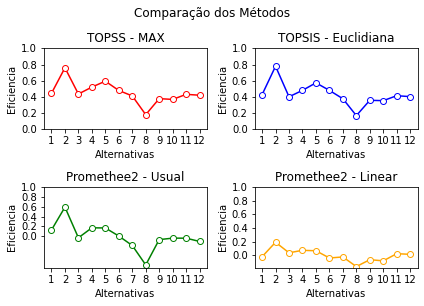

In [ ]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(cont, resp_topsis_max, color="red", marker="o", markerfacecolor="white")
axs[0, 0].set_title('TOPSS - MAX')

axs[0, 1].plot(cont, resp_topsis_eucl, color="blue", marker="o", markerfacecolor="white")
axs[0, 1].set_title('TOPSIS - Euclidiana')

axs[1, 0].plot(cont, resp_promethee2_usual, color="green", marker="o", markerfacecolor="white")
axs[1, 0].set_title('Promethee2 - Usual')

axs[1, 1].plot(cont, resp_promethee2_linear, color="orange", marker="o", markerfacecolor="white")
axs[1, 1].set_title('Promethee2 - Linear')

for ax in axs.flat:
    ax.set(xlabel='Alternativas', ylabel='Eficiencia')
    ax.set_xticks(cont)
    ax.set_yticks(efc_01)

st = fig.suptitle("Comparação dos Métodos", y=1.05)
fig.tight_layout()
plt.show()

In [ ]:
# Definindo e organizando o DataFrame das respostas obtidas
cont = np.arange(1, 13)

df_resp_01 = pd.DataFrame({"Alternativas": cont,  "TOPSIS - 01": resp_topsis_01})
df_resp_max = pd.DataFrame({"Alternativas": cont, "TOPSIS - MAX": resp_topsis_max})
df_resp_soma = pd.DataFrame({"Alternativas": cont, "TOPSIS - SOMA": resp_topsis_sum})
df_resp_euc = pd.DataFrame({"Alternativas": cont, "TOPSIS - Euclidiana": resp_topsis_eucl})
df_resp_pro_usu = pd.DataFrame({"Alternativas": cont, "Promethee2 - Usual": resp_promethee2_usual})
df_resp_pro_u = pd.DataFrame({"Alternativas": cont, "Promethee2 - U": resp_promethee2_ushape})
df_resp_pro_v = pd.DataFrame({"Alternativas": cont, "Promethee2 - V": resp_promethee2_vshape})
df_resp_pro_lev = pd.DataFrame({"Alternativas": cont, "Promethee2 - Level": resp_promethee2_level})
df_resp_pro_lin = pd.DataFrame({"Alternativas": cont, "Promethee2 - Linear": resp_promethee2_linear})

df_resp_01 = df_resp_01.sort_values(["TOPSIS - 01", "Alternativas"], ascending=False).reset_index(drop=True)
df_resp_max = df_resp_max.sort_values(["TOPSIS - MAX", "Alternativas"], ascending=False).reset_index(drop=True)
df_resp_soma = df_resp_soma.sort_values(["TOPSIS - SOMA", "Alternativas"], ascending=False).reset_index(drop=True)
df_resp_euc = df_resp_euc.sort_values(["TOPSIS - Euclidiana", "Alternativas"], ascending=False).reset_index(drop=True)
df_resp_pro_usu = df_resp_pro_usu.sort_values(["Promethee2 - Usual", "Alternativas"], ascending=False).reset_index(drop=True)
df_resp_pro_u = df_resp_pro_u.sort_values(["Promethee2 - U", "Alternativas"], ascending=False).reset_index(drop=True)
df_resp_pro_v = df_resp_pro_v.sort_values(["Promethee2 - V", "Alternativas"], ascending=False).reset_index(drop=True)
df_resp_pro_lev = df_resp_pro_lev.sort_values(["Promethee2 - Level", "Alternativas"], ascending=False).reset_index(drop=True)
df_resp_pro_lin = df_resp_pro_lin.sort_values(["Promethee2 - Linear", "Alternativas"], ascending=False).reset_index(drop=True)


df_resultado = pd.concat([df_resp_01, df_resp_max, df_resp_soma, df_resp_euc, df_resp_pro_usu, df_resp_pro_u, df_resp_pro_v, df_resp_pro_lev, df_resp_pro_lin], axis=1)
# Imprimindo o Resultado
df_resultado

,Alternativas,TOPSIS - 01,Alternativas,TOPSIS - MAX,Alternativas,TOPSIS - SOMA,Alternativas,TOPSIS - Euclidiana,Alternativas,Promethee2 - Usual,Alternativas,Promethee2 - U,Alternativas,Promethee2 - V,Alternativas,Promethee2 - Level,Alternativas,Promethee2 - Linear
0,2,0.791721,2,0.759956,2,0.772556,2,0.779217,2,0.590591,2,0.353545,2,0.316273,2,0.176773,2,0.190583
1,5,0.597996,5,0.594392,5,0.573092,5,0.573886,4,0.170909,5,0.127545,4,0.101364,5,0.063773,4,0.072106
2,6,0.526324,4,0.521171,4,0.486305,4,0.480614,5,0.167727,4,0.107455,5,0.085000,4,0.053727,5,0.065727
3,4,0.489032,6,0.479119,6,0.472391,6,0.480253,1,0.126045,3,0.041909,3,0.038909,3,0.020955,3,0.035765
4,1,0.440225,1,0.444196,1,0.427949,1,0.427318,6,0.003545,6,-0.001773,11,0.018864,6,-0.000886,11,0.022689
5,7,0.405197,3,0.435527,11,0.425915,11,0.414563,3,-0.031955,11,-0.007727,1,0.012182,11,-0.003864,12,0.013576
6,9,0.400112,11,0.431328,12,0.413962,12,0.403042,10,-0.039273,7,-0.020727,12,-0.011136,7,-0.010364,1,-0.021811
7,10,0.396205,12,0.420704,3,0.410716,3,0.401322,11,-0.040045,12,-0.025955,6,-0.042773,12,-0.012977,7,-0.025008
8,3,0.384233,7,0.411877,7,0.377123,7,0.377202,9,-0.069273,1,-0.066773,10,-0.067864,1,-0.033386,6,-0.040189
9,11,0.369273,9,0.378164,9,0.352989,9,0.357572,12,-0.106545,10,-0.109591,9,-0.078909,10,-0.054795,9,-0.065295


In [ ]:
df_result = pd.concat([df_resp_max, df_resp_euc, df_resp_pro_usu, df_resp_pro_lin], axis=1)
df_result

,Alternativas,TOPSIS - MAX,Alternativas,TOPSIS - Euclidiana,Alternativas,Promethee2 - Usual,Alternativas,Promethee2 - Linear
0,2,0.759956,2,0.779217,2,0.590591,2,0.190583
1,5,0.594392,5,0.573886,4,0.170909,4,0.072106
2,4,0.521171,4,0.480614,5,0.167727,5,0.065727
3,6,0.479119,6,0.480253,1,0.126045,3,0.035765
4,1,0.444196,1,0.427318,6,0.003545,11,0.022689
5,3,0.435527,11,0.414563,3,-0.031955,12,0.013576
6,11,0.431328,12,0.403042,10,-0.039273,1,-0.021811
7,12,0.420704,3,0.401322,11,-0.040045,7,-0.025008
8,7,0.411877,7,0.377202,9,-0.069273,6,-0.040189
9,9,0.378164,9,0.357572,12,-0.106545,9,-0.065295
